In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
pd.set_option('display.float_format', '{:.4f}'.format)

In [3]:
columns = ['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'grade', 'annual_inc', 'issue_d',
'dti', 'revol_bal', 'total_pymnt', 'loan_status']

## PART1: DATA EXPLORATION AND EVALUATION

In [4]:
loans = pd.read_csv("loan.csv", low_memory= False)

Load the data, select the relevant columns, and perform any necessary cleaning and aggregations to explore and better
understand the dataset. 

Describe any assumptions you made to handle null variables and outliers. 
Describe the distributions of the features.

Include two data visualizations and two summary statistics to support these findings.

In [5]:
loan_subset = loans[columns]

In [6]:
loan_subset.head()

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status
0,2500,2500,36 months,13.5600,C,55000.0000,Dec-2018,18.2400,4341,167.0200,Current
1,30000,30000,60 months,18.9400,D,90000.0000,Dec-2018,26.5200,12315,1507.1100,Current
2,5000,5000,36 months,17.9700,D,59280.0000,Dec-2018,10.5100,4599,353.8900,Current
3,4000,4000,36 months,18.9400,D,92000.0000,Dec-2018,16.7400,5468,286.7100,Current
4,30000,30000,60 months,16.1400,C,57250.0000,Dec-2018,26.3500,829,1423.2100,Current


In [7]:
loan_subset.dtypes

loan_amnt        int64
funded_amnt      int64
term            object
int_rate       float64
grade           object
annual_inc     float64
issue_d         object
dti            float64
revol_bal        int64
total_pymnt    float64
loan_status     object
dtype: object

In [42]:
loan_subset.loc[:,'term_int'] = loan_subset.term.str.slice(1,3).astype(int)

#typing
loan_subset.loc[:,'issue_date'] = pd.to_datetime(loan_subset.issue_d, format='%b-%Y')
loan_subset.loc[:,'month_issued'] = loan_subset.issue_date.dt.month
loan_subset.loc[:,'year_issued'] = loan_subset.issue_date.dt.year

loan_subset.loc[:,'grade'] = loan_subset.grade.astype('category')
loan_subset.loc[:,'loan_status'] = loan_subset.loan_status.astype('category')

In [9]:
#missings?
loan_subset.isnull().sum()

loan_amnt          0
funded_amnt        0
term               0
int_rate           0
grade              0
annual_inc         4
issue_d            0
dti             1711
revol_bal          0
total_pymnt        0
loan_status        0
term_int           0
issue_date         0
month_issued       0
year_issued        0
dtype: int64

In [10]:
#percent_missings?
loan_subset.isnull().sum() * 100 / len(loan_subset)

loan_amnt      0.0000
funded_amnt    0.0000
term           0.0000
int_rate       0.0000
grade          0.0000
annual_inc     0.0002
issue_d        0.0000
dti            0.0757
revol_bal      0.0000
total_pymnt    0.0000
loan_status    0.0000
term_int       0.0000
issue_date     0.0000
month_issued   0.0000
year_issued    0.0000
dtype: float64

In [11]:
#lets store these somewhere safe
null_data = loan_subset[loan_subset.isnull().any(axis=1)]

In [12]:
null_data.head()

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,dti,revol_bal,total_pymnt,loan_status,term_int,issue_date,month_issued,year_issued
428,13000,13000,60 months,10.7200,B,0.0000,Dec-2018,nan,32720,273.1100,Current,60,2018-12-01,12,2018
593,18000,18000,60 months,16.9100,C,0.0000,Dec-2018,nan,8546,867.6000,Current,60,2018-12-01,12,2018
1605,35000,35000,60 months,16.9100,C,0.0000,Dec-2018,nan,27917,1686.9800,Current,60,2018-12-01,12,2018
2647,5500,5500,36 months,13.5600,C,0.0000,Dec-2018,nan,1391,363.2600,Current,36,2018-12-01,12,2018
3404,4700,4700,36 months,10.3300,B,0.0000,Dec-2018,nan,158,298.0400,Current,36,2018-12-01,12,2018


In [13]:
#96% of missing values just have missing annual income and account for less than 0.1% of the data.
#dropping these is not going to matter
sum(((null_data['annual_inc']==0) | null_data['annual_inc'].isnull()) & (null_data['dti'].isnull()))*100/len(null_data)

96.73469387755102

In [14]:
loan_nomissings = loan_subset.drop(null_data.index)

We will be exploring Lending Club’s loan origination data from 2007-2015.

In [15]:
#data is NOT from 2007-2015
print("From %s" % min(loan_nomissings.year_issued))
print("To %s" %max(loan_nomissings.year_issued))

From 2007
To 2018


In [16]:
loan_nomissings.describe()

,loan_amnt,funded_amnt,int_rate,annual_inc,dti,revol_bal,total_pymnt,term_int,month_issued,year_issued
count,2258953.0000,2258953.0000,2258953.0000,2258953.0000,2258953.0000,2258953.0000,2258953.0000,2258953.0000,2258953.0000,2258953.0000
mean,15043.8754,15038.6043,13.0921,78051.5025,18.8242,16658.9049,11827.2265,42.9081,6.7523,2015.8564
std,9188.0720,9186.2359,4.8314,112718.4204,14.1833,22945.3779,9890.3945,10.8661,3.4096,1.7926
min,500.0000,500.0000,5.3100,0.0000,-1.0000,0.0000,0.0000,36.0000,1.0000,2007.0000
25%,8000.0000,8000.0000,9.4900,46000.0000,11.8900,5951.0000,4274.4700,36.0000,4.0000,2015.0000
50%,12900.0000,12850.0000,12.6200,65000.0000,17.8400,11325.0000,9065.1200,36.0000,7.0000,2016.0000
75%,20000.0000,20000.0000,15.9900,93000.0000,24.4900,20247.0000,16712.6200,60.0000,10.0000,2017.0000
max,40000.0000,40000.0000,30.9900,110000000.0000,999.0000,2904836.0000,63296.8779,60.0000,12.0000,2018.0000


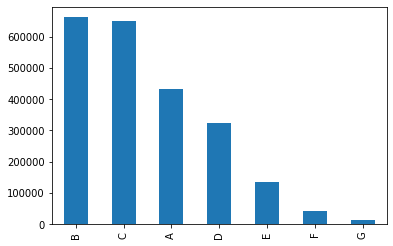

In [17]:
loan_nomissings.grade.value_counts().plot(kind='bar')

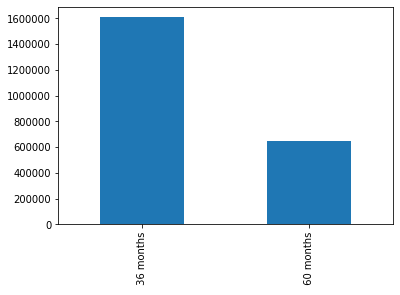

In [18]:
loan_nomissings.term.value_counts().plot(kind='bar')

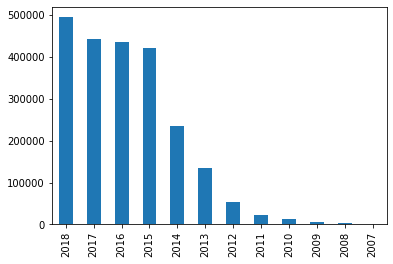

In [19]:
loan_nomissings.year_issued.value_counts().plot(kind='bar')

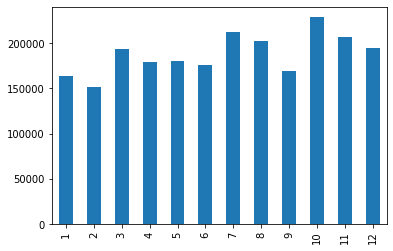

In [20]:
loan_nomissings.month_issued.value_counts().reindex([1,2,3,4,5,6,7,8,9,10,11,12]).plot(kind='bar')

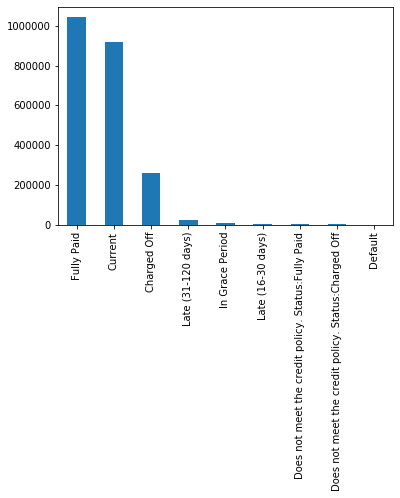

In [21]:
loan_nomissings.loan_status.value_counts().plot(kind='bar')

Loan Amount Distribution BoxPlot


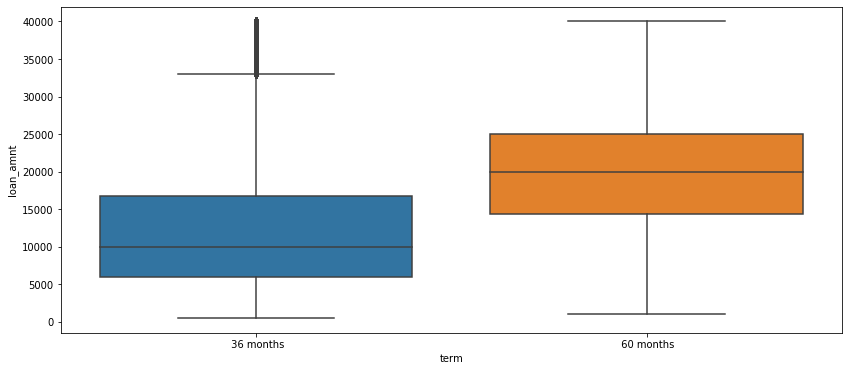

In [22]:
plt.figure(figsize = (14,6))
print("Loan Amount Distribution BoxPlot")
sns.boxplot(x=loan_nomissings.term, y=loan_nomissings.loan_amnt)

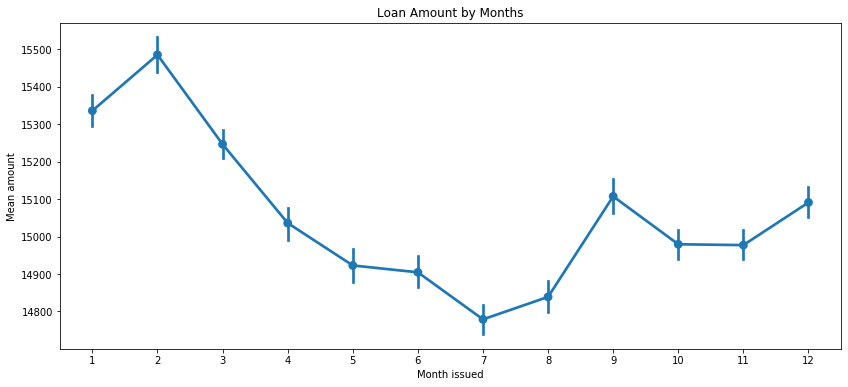

In [23]:
plt.figure(figsize = (14,6))
g = sns.pointplot(x='month_issued', y='loan_amnt', 
              data=loan_nomissings)
g.set_xticklabels(g.get_xticklabels())
g.set_xlabel("Month issued")
g.set_ylabel("Mean amount")
g.set_title("Loan Amount by Months")
plt.show()

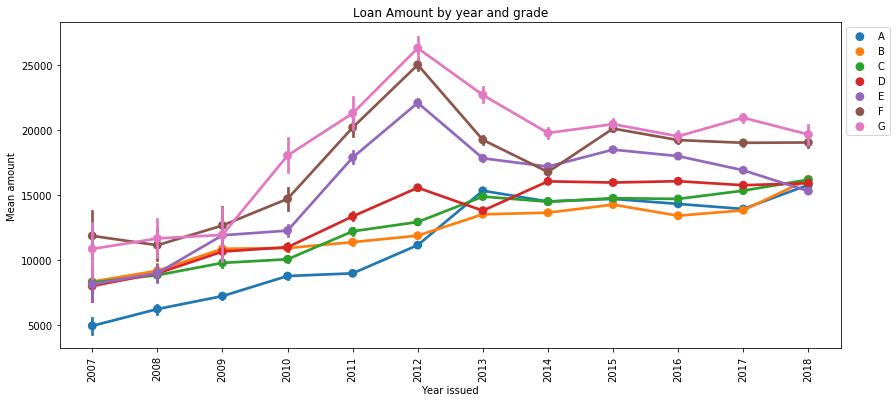

In [24]:
plt.figure(figsize = (14,6))
g = sns.pointplot(x='year_issued', y='loan_amnt', 
              data=loan_nomissings, hue='grade')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Year issued")
g.set_ylabel("Mean amount")
g.set_title("Loan Amount by year and grade")
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)
plt.show()

In [25]:
##one could say average loan sizes ate stable since 2013 for all grades

### Data insight: How has the portfolio in terms of total amount lended to which Grade changed?

In [26]:
year_amt = loan_nomissings.loan_amnt.groupby([loan_nomissings.year_issued]).agg(lambda x: sum(x))

In [27]:
year_grade_amt = loan_nomissings.loan_amnt.groupby([loan_nomissings.year_issued,loan_nomissings.grade]).agg(lambda x: sum(x))

In [28]:
year_grade_pct = year_grade_amt/year_amt

In [29]:
year_grade_pct = year_grade_pct.reset_index()

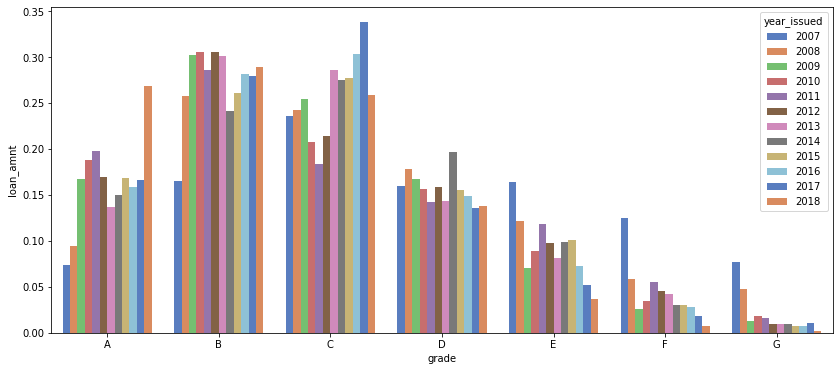

In [30]:
plt.figure(figsize = (14,6))
sns.barplot(y='loan_amnt', x="grade",hue="year_issued", data=year_grade_pct, palette='muted')

In [31]:
## EFG declining, ABC increasing, D stable

## PART2: BUSINESS ANALYSIS

We are interested in evaluating whether the 36 month term loans would make for a good investment.

Please investigate the following.

Assume a 36 month investment period for each loan, and exclude loans with less than 36 months of data available.

In [32]:
#I assume this is where the 2007-2015 assumption comes from? 2018 minus 3 active years is 2015...
#so we are going to filter until Dec-2015
loan_nomissings_until_2015 = loan_nomissings[loan_nomissings.year_issued <=2015]

#not sure if this means to check only the ones that are 36 months long or just assume that all of them were 36 months long?
#loan_nomissings_until_2015 = loan_nomissings[loan_nomissings.term_int == 36]

### What percentage of loans has been fully paid?

In [33]:
print("%.2f%% of loans before 1 Jan 2016 has been paid fully according to the loan_status column" % (sum((loan_nomissings_until_2015.loan_status == "Fully Paid")) * 100 / len(loan_nomissings_until_2015)))
print("%.2f%% of ALL loans have been paid fully according to the loan_status column, this includes currently open loans" % (sum((loan_nomissings.loan_status == "Fully Paid")) * 100 / len(loan_nomissings)))

75.63% of loans before 1 Jan 2016 has been paid fully according to the loan_status column
46.11% of ALL loans have been paid fully according to the loan_status column, this includes currently open loans


### When bucketed by Year and Grade, which bucket has highest raid of default

In [34]:
#filtering out paid and current loans
loan_nomissings_until_2015.loc[:,"defaulted"] = (loan_nomissings_until_2015.loan_status != "Fully Paid") & (loan_nomissings_until_2015.loan_status != "Current")

/home/biebiep/.local/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/biebiep/.local/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [35]:
#loans per year
year_grade_loans = loan_nomissings_until_2015.defaulted.groupby([loan_nomissings_until_2015.year_issued,loan_nomissings_until_2015.grade]).agg(lambda x: len(x))
#defaulting loans per year
year_grade_dflt = loan_nomissings_until_2015.defaulted.groupby([loan_nomissings_until_2015.year_issued,loan_nomissings_until_2015.grade]).agg(lambda x: sum(x))
#percentage default per year
year_grade_dflt_pct = year_grade_dflt/year_grade_loans
#solution
year_grade_dflt_pct = year_grade_dflt_pct.reset_index()

#couldve done this in one .agg(lambda x: sum(x)/len(x)) but having the intermediary numbers somewhere handy is always nice

In [36]:
year_grade_dflt_pct

,year_issued,grade,defaulted
0,2007,A,0.2432
1,2007,B,0.4592
2,2007,C,0.5674
3,2007,D,0.7778
4,2007,E,0.9100
...,...,...,...
58,2015,C,0.2001
59,2015,D,0.2827
60,2015,E,0.3528
61,2015,F,0.4407


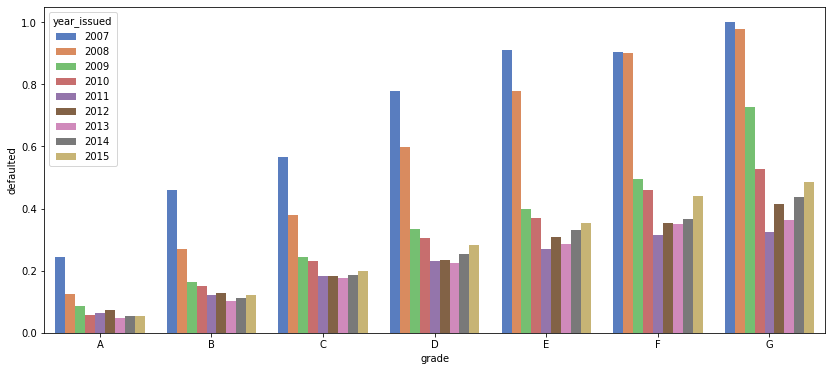

In [37]:
plt.figure(figsize = (14,6))
sns.barplot(y='defaulted', x="grade",hue="year_issued", data=year_grade_dflt_pct, palette='muted')

In [38]:
def calculate_arr_simple(total: int, funded: int) -> float:
    arr = ((total/funded)**(1/3) - 1)
    return arr

### when bucketed by year and grade, what is the ARR of these loans on average?

In [39]:
loan_nomissings_until_2015.loc[:,'arr'] = ((loan_nomissings_until_2015.total_pymnt/loan_nomissings_until_2015.funded_amnt)**(1/3)) - 1

In [40]:
year_grade_avg_arr = loan_nomissings_until_2015.arr.groupby([loan_nomissings_until_2015.year_issued,loan_nomissings_until_2015.grade]).agg(lambda x: np.mean(x))
year_grade_avg_arr = year_grade_avg_arr.reset_index()

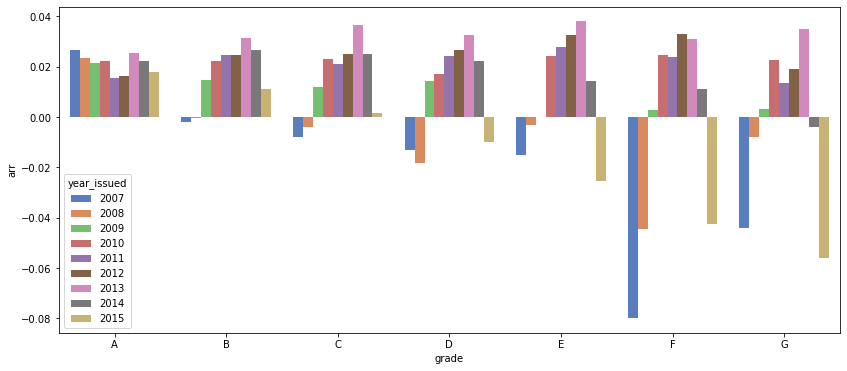

In [41]:
plt.figure(figsize = (14,6))
sns.barplot(y='arr', x="grade",hue="year_issued", data=year_grade_avg_arr, palette='muted')